In [1]:
import pandas as pd
from collections import deque
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
N = 3  # Puzzle dimension

def find_blank(df):
    """Locate the blank (0) position in the DataFrame."""
    pos = df.stack().eq(0)
    row, col = pos[pos].index[0]
    return row, col


In [3]:
def generate_successors(df):
    """Generate all valid successor states as DataFrames."""
    successors = []
    x, y = find_blank(df)

    moves = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Left, Right, Up, Down

    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < N:
            new_df = df.copy()
            new_df.iloc[x, y], new_df.iloc[nx, ny] = new_df.iloc[nx, ny], new_df.iloc[x, y]
            successors.append(new_df)

    return successors

In [4]:
def reconstruct_path(state, parents):
    """Reconstruct path from initial to goal using parent mapping."""
    path = []
    while state is not None:
        path.append(state)
        parent = parents.get(state.to_json(), None)
        state = parent
    return list(reversed(path))

In [5]:
def solve_bfs(initial_state, goal_state):
    frontier = deque([initial_state])
    visited = {initial_state.to_json()}
    parents = {initial_state.to_json(): None}

    while frontier:
        grid = frontier.popleft()
        if grid.equals(goal_state):
            return reconstruct_path(grid, parents)

        for successor in generate_successors(grid):
            key = successor.to_json()
            if key not in visited:
                visited.add(key)
                parents[key] = grid
                frontier.append(successor)
    return None

In [6]:
def solve_dfs(initial_state, goal_state, max_depth=20):
    if max_depth > 50:
        max_depth = 50

    stack = [(initial_state, 0)]
    visited = {initial_state.to_json()}
    parents = {initial_state.to_json(): None}

    while stack:
        grid, depth = stack.pop()
        if grid.equals(goal_state):
            return reconstruct_path(grid, parents)

        if depth < max_depth:
            for successor in generate_successors(grid):
                key = successor.to_json()
                if key not in visited:
                    visited.add(key)
                    parents[key] = grid
                    stack.append((successor, depth + 1))
    return None


In [ ]:
initial_state = pd.DataFrame([[2, 8, 3],[1, 6, 4],[7, 0, 5]])
final_goal_state = pd.DataFrame([[1, 2, 3],[8, 0, 4],[7, 6, 5]])

In [8]:
bfs_path = solve_bfs(initial_state, final_goal_state)

In [9]:
dfs_path = solve_dfs(initial_state, final_goal_state, max_depth=20)

In [11]:
print_path_text(bfs_path, "BFS")

NameError: name 'print_path_text' is not defined

In [12]:
def print_path_text(path, algo_name):
    print(f"\n{algo_name} Solution Path:")
    for depth, grid in enumerate(path):
        print(f"Depth: {depth}")
        print(grid.to_string(index=False, header=False))
        print("--------")

def plot_path_graph(path, algo_name):
    for depth, grid in enumerate(path):
        plt.figure(figsize=(3, 3))
        sns.heatmap(grid, annot=True, cbar=False, square=True,
                    linewidths=1, linecolor="black", cmap="Blues",
                    fmt="d", annot_kws={"size": 16})
        plt.title(f"{algo_name} - Depth {depth}")
        plt.show()

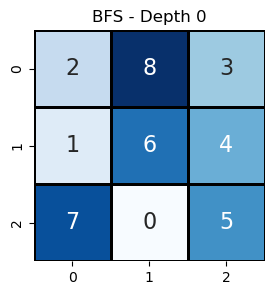

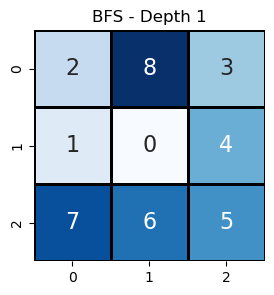

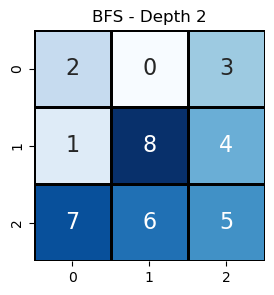

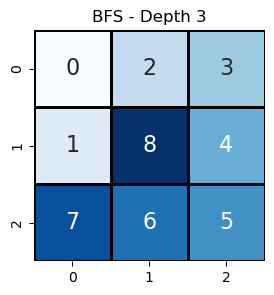

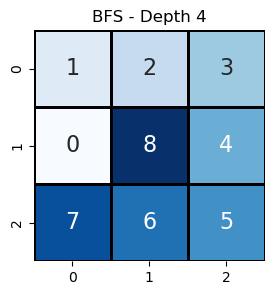

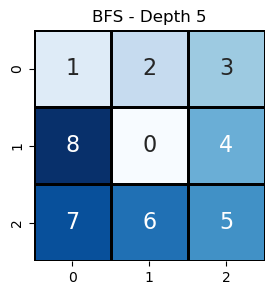

In [13]:
plot_path_graph(bfs_path, "BFS")

In [14]:
print_path_text(dfs_path, "DFS")


DFS Solution Path:
Depth: 0
2 8 3
1 6 4
7 0 5
--------
Depth: 1
2 8 3
1 0 4
7 6 5
--------
Depth: 2
2 0 3
1 8 4
7 6 5
--------
Depth: 3
0 2 3
1 8 4
7 6 5
--------
Depth: 4
1 2 3
0 8 4
7 6 5
--------
Depth: 5
1 2 3
8 0 4
7 6 5
--------


In [15]:
bfs_path = solve_bfs(initial_state, final_goal_state)

In [16]:
dfs_path = solve_dfs(initial_state, final_goal_state, max_depth=25)

In [17]:
print_path_text(bfs_path, "BFS")


BFS Solution Path:
Depth: 0
2 8 3
1 6 4
7 0 5
--------
Depth: 1
2 8 3
1 0 4
7 6 5
--------
Depth: 2
2 0 3
1 8 4
7 6 5
--------
Depth: 3
0 2 3
1 8 4
7 6 5
--------
Depth: 4
1 2 3
0 8 4
7 6 5
--------
Depth: 5
1 2 3
8 0 4
7 6 5
--------


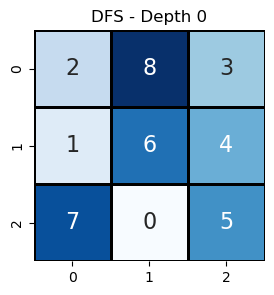

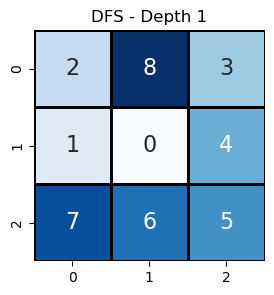

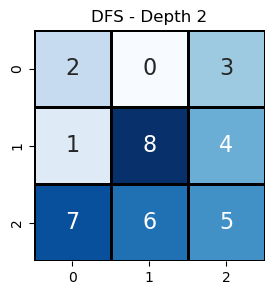

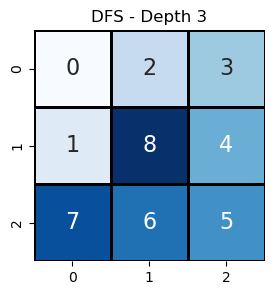

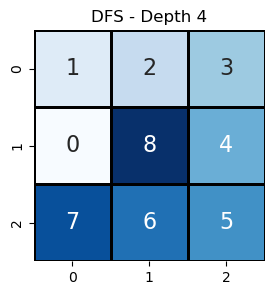

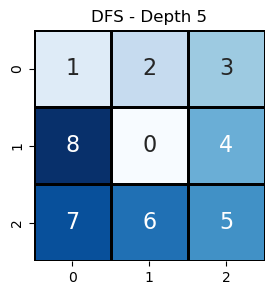

In [18]:
plot_path_graph(dfs_path, "DFS")